# Part 1 - Slides Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math #required for the sqrt function (square root)

# Create dataset as a Series
ds1 = pd.Series([65,65,70,75,80,81,85,90,95,100])
ds2 = pd.Series([35,35,37,40,43,56,57,58,60])
ds3 = pd.Series([21, 22, 24, 25, 29, 37, 49])

data = ds3

In [2]:
# Full descriptive summary
summary = data.describe()
print("\nDescribe():\n", summary)


Describe():
 count     7.000000
mean     29.571429
std      10.130106
min      21.000000
25%      23.000000
50%      25.000000
75%      33.000000
max      49.000000
dtype: float64


In [3]:
# Measures of Central Tendency
mean = data.mean()
median = data.median()
mode = data.mode()   # can be multiple modes
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode.tolist())

Mean: 29.571428571428573
Median: 25.0
Mode: [21, 22, 24, 25, 29, 37, 49]


In [4]:
# Measures of spread
variance = data.var()
std_dev = data.std()
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Variance: 102.61904761904763
Standard Deviation: 10.130106002359879


In [5]:
# Quartiles using quantile() - these are not always returning exactly the same as the Tukey method. See slides

Q1 = data.quantile(0.25)
Q2 = data.quantile(0.50)  # median
Q3 = data.quantile(0.75)

print("Q1:", Q1)
print("Q2 (Median):", Q2)
print("Q3:", Q3)

Q1: 23.0
Q2 (Median): 25.0
Q3: 33.0


In [6]:
print("="*60)
print("IQR, FENCES, OUTLIERS")
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = data[(data < lower_fence) | (data > upper_fence)]

print("IQR:", IQR)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)
print("Outliers:", outliers.tolist() if not outliers.empty else "None")

IQR, FENCES, OUTLIERS
IQR: 10.0
Lower fence: 8.0
Upper fence: 48.0
Outliers: [49]


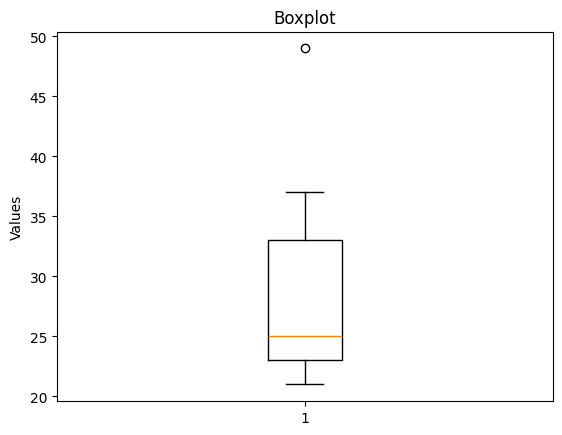

In [7]:
# Create boxplot
plt.boxplot(data) # matplotlib.pyplot.boxplot uses the Tukey method by default. For more information, check the documentation.
plt.title("Boxplot")
plt.ylabel("Values")
plt.show()

# Part 2 - Temperature data

In [8]:
# --- Data ---
tempMin = pd.Series([50.7, 52.8, 48.6, 53.0, 49.9, 47.9, 54.1, 47.6, 43.6, 45.5])
tempMax = pd.Series([59.5, 55.7, 57.3, 71.5, 69.8, 68.8, 67.5, 66.0, 66.1, 61.7])

# --- Means ---
print("Mean tempMin:", tempMin.mean())
print("Mean tempMax:", tempMax.mean())

# --- Medians ---
print("Median tempMin:", tempMin.median())
print("Median tempMax:", tempMax.median())

# --- Standard deviations ---
print("SD tempMin:", tempMin.std())
print("SD tempMax:", tempMax.std())

# --- Summaries ---
print("\nSummary tempMin:\n", tempMin.describe())
print("\nSummary tempMax:\n", tempMax.describe())

Mean tempMin: 49.370000000000005
Mean tempMax: 64.39000000000001
Median tempMin: 49.25
Median tempMax: 66.05
SD tempMin: 3.3915090053445724
SD tempMax: 5.491296143291976

Summary tempMin:
 count    10.000000
mean     49.370000
std       3.391509
min      43.600000
25%      47.675000
50%      49.250000
75%      52.275000
max      54.100000
dtype: float64

Summary tempMax:
 count    10.000000
mean     64.390000
std       5.491296
min      55.700000
25%      60.050000
50%      66.050000
75%      68.475000
max      71.500000
dtype: float64


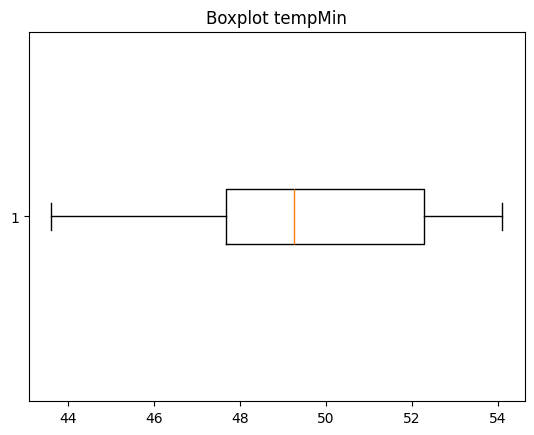

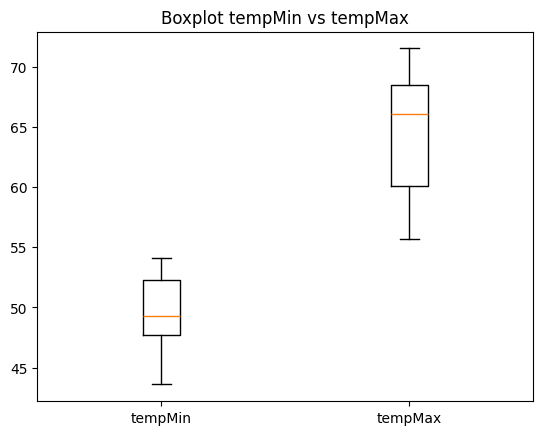

In [9]:
# --- Boxplots ---

plt.boxplot(tempMin, vert=False)
plt.title("Boxplot tempMin")
plt.show()

plt.boxplot([tempMin, tempMax], tick_labels=["tempMin", "tempMax"])
plt.title("Boxplot tempMin vs tempMax")
plt.show()

IQR: 4.600000000000001
Lower Fence: 40.77499999999999
Upper Fence: 59.175
Count below lowerFence: 0
Count above upperFence: 0

New Summary tempMin:
 count    11.000000
mean     50.790909
std       5.706217
min      43.600000
25%      47.750000
50%      49.900000
75%      52.900000
max      65.000000
dtype: float64


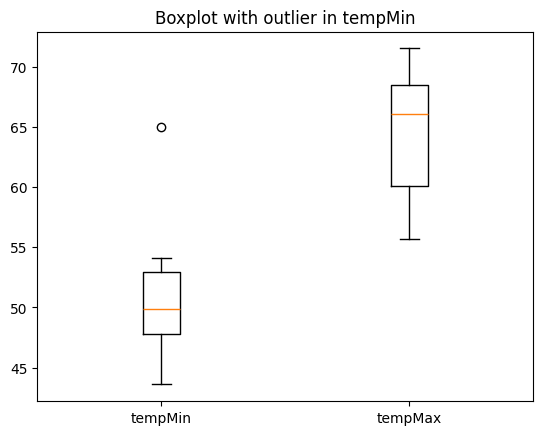

New Lower Fence: 40.025000000000006
New Upper Fence: 60.625
Count below lowerFence: 0
Count above upperFence: 1
Outliers: [65.]
Variance tempMin: 32.56090909090909
SD via sqrt(var): 5.706216705568506
SD directly via pandas: 5.706216705568506


In [10]:
# --- IQR, fences, outliers for tempMin ---
q1, q3 = tempMin.quantile(0.25), tempMin.quantile(0.75)
iqr = q3 - q1
lowerFence = q1 - 1.5 * iqr
upperFence = q3 + 1.5 * iqr

print("IQR:", iqr)
print("Lower Fence:", lowerFence)
print("Upper Fence:", upperFence)
print("Count below lowerFence:", (tempMin < lowerFence).sum())
print("Count above upperFence:", (tempMin > upperFence).sum())

# --- Addin an outlier, value 65 to tempMin ---
tempMin = pd.Series([50.7, 52.8, 48.6, 53.0, 49.9, 47.9, 54.1, 47.6, 43.6, 45.5, 65])

print("\nNew Summary tempMin:\n", tempMin.describe())

plt.boxplot([tempMin, tempMax], tick_labels=["tempMin", "tempMax"])
plt.title("Boxplot with outlier in tempMin")
plt.show()

# --- New IQR & fences after adding 65 ---
q1, q3 = tempMin.quantile(0.25), tempMin.quantile(0.75)
iqr = q3 - q1
lowerFence = q1 - 1.5 * iqr
upperFence = q3 + 1.5 * iqr

print("New Lower Fence:", lowerFence)
print("New Upper Fence:", upperFence)
print("Count below lowerFence:", (tempMin < lowerFence).sum())
print("Count above upperFence:", (tempMin > upperFence).sum())
print("Outliers:", tempMin[tempMin > upperFence].values)

# --- Variance and SD manually ---
print("Variance tempMin:", tempMin.var())
print("SD via sqrt(var):", math.sqrt(tempMin.var()))
print("SD directly via pandas:", tempMin.std())

# Part 3 intake dataset

    pre  post
0  5260  3910
1  5470  4220
2  5640  3885
3  6180  5160
4  6390  5645


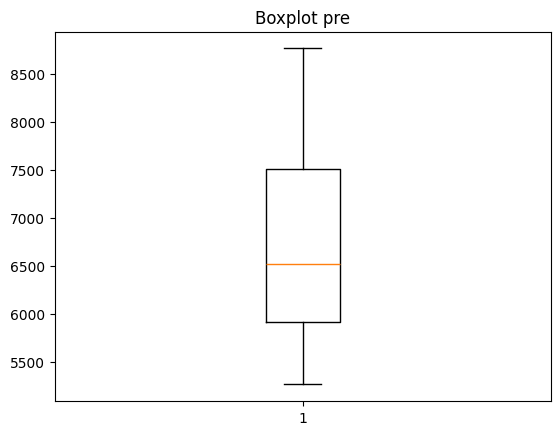

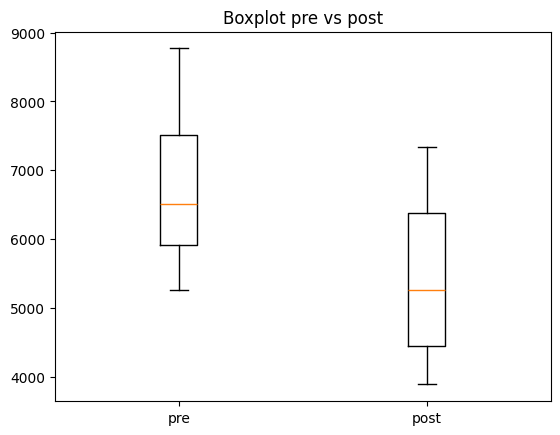

In [11]:
# --- Load intake dataset ---
intake = pd.read_csv("https://raw.githubusercontent.com/hogeschool/CMIBOD021T-2526/refs/heads/main/data/iswr/intake.csv")
print(intake.head())

# --- Boxplots for intake ---
plt.boxplot(intake["pre"])
plt.title("Boxplot pre")
plt.show()

plt.boxplot([intake["pre"], intake["post"]], tick_labels=["pre", "post"])
plt.title("Boxplot pre vs post")
plt.show()

# Energy Dataset

   expend stature
0    9.21   obese
1    7.53    lean
2    7.48    lean
3    8.08    lean
4    8.09    lean


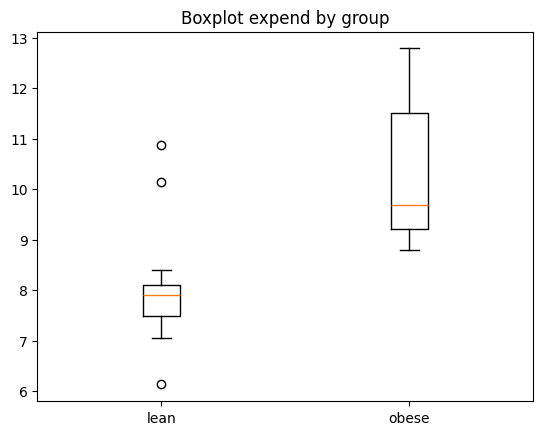

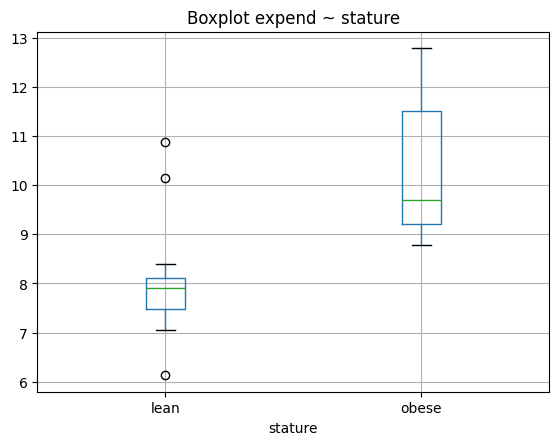

In [12]:
# --- Load energy dataset ---
energy = pd.read_csv("https://raw.githubusercontent.com/hogeschool/CMIBOD021T-2526/refs/heads/main/data/iswr/energy.csv")
print(energy.head())

# --- Select lean and obese expenditures ---
# Subset: Series
expendLean = energy[energy["stature"] == "lean"]["expend"]
expendObese = energy[energy["stature"] == "obese"]["expend"]

# --- Boxplot lean vs obese ---
plt.boxplot([expendLean, expendObese], tick_labels=["lean", "obese"])
plt.title("Boxplot expend by group")
plt.show()

# --- Equivalent to R: boxplot(expend ~ stature) ---
energy.boxplot(column="expend", by="stature")
plt.title("Boxplot expend ~ stature")
plt.suptitle("") 
plt.show()

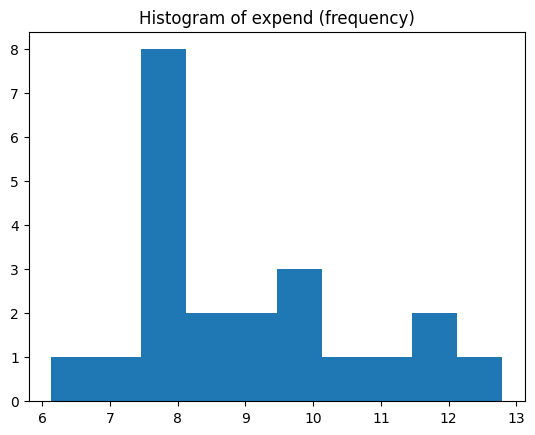

In [13]:
# Simple histogram (frequency counts)
plt.hist(energy["expend"])  # default bins
plt.title("Histogram of expend (frequency)")
plt.show()

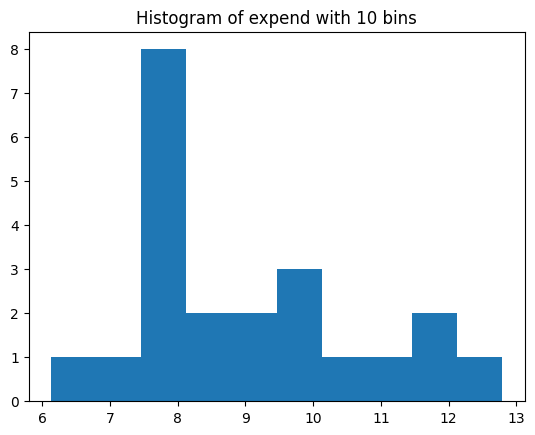

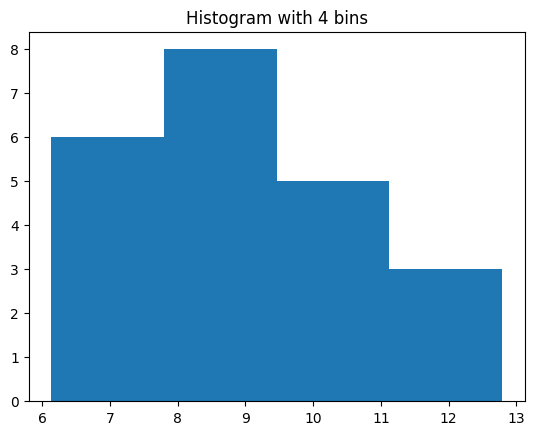

In [14]:
# Histogram with 10 bins
plt.hist(energy["expend"], bins=10)
plt.title("Histogram of expend with 10 bins")
plt.show()

# Histogram with 4 bins
plt.hist(energy["expend"], bins=4)
plt.title("Histogram with 4 bins")
plt.show()


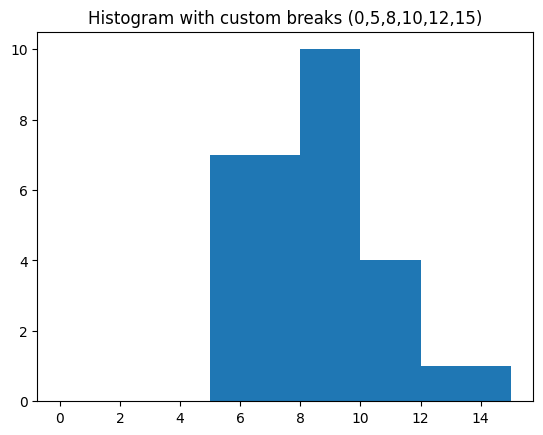

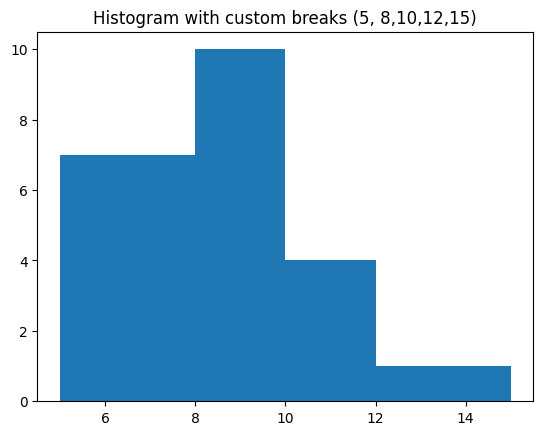

In [15]:
# Custom breakpoints
br = [0, 5, 8, 10, 12, 15]
plt.hist(energy["expend"], bins=br)
plt.title("Histogram with custom breaks (0,5,8,10,12,15)")
plt.show()

br = [5, 8, 10, 12, 15]
plt.hist(energy["expend"], bins=br)
plt.title("Histogram with custom breaks (5, 8,10,12,15)")
plt.show()

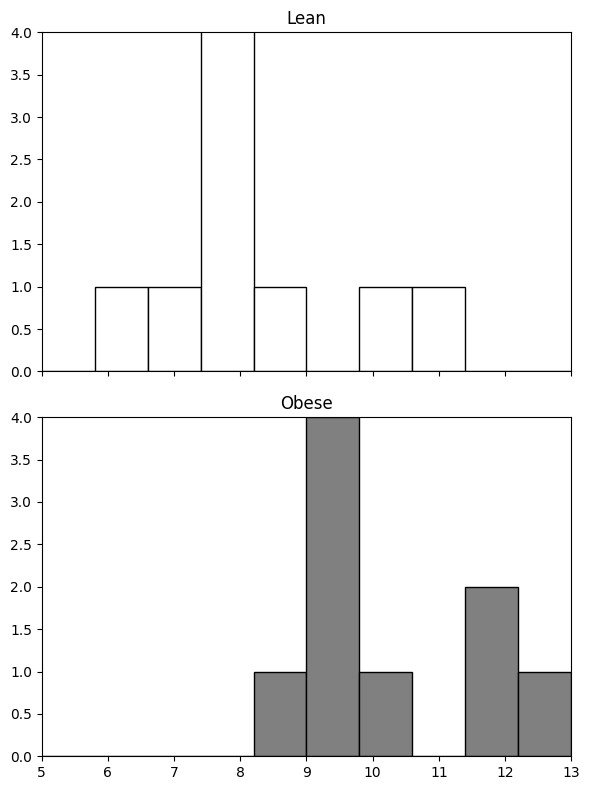

In [16]:

# Comparing lean vs obese (two rows, like par(mfrow=c(2,1)))
fig, axes = plt.subplots(2, 1, figsize=(6,8), sharex=True, sharey=True)

axes[0].hist(expendLean, bins=10, range=(5,13), color="white", edgecolor="black")
axes[0].set_xlim(5,13)
axes[0].set_ylim(0,4)
axes[0].set_title("Lean")

axes[1].hist(expendObese, bins=10, range=(5,13), color="grey", edgecolor="black")
axes[1].set_xlim(5,13)
axes[1].set_ylim(0,4)
axes[1].set_title("Obese")

plt.tight_layout()
plt.show()


# smoke dataset

In [17]:
# smoking status

# Build the DataFrame
data = [[51, 43, 22],
        [92, 28, 21],
        [68, 22,  9]]

smoke = pd.DataFrame(
    data,
    index=["current", "former", "never"],
    columns=["High", "Low", "Middle"]
)

print("Table:\n", smoke)

# Margins
print("\nTotal (all):", smoke.values.sum())        # margin.table(smoke)
print("\nRow sums:\n", smoke.sum(axis=1))          # margin.table(smoke,1)
print("\nColumn sums:\n", smoke.sum(axis=0))       # margin.table(smoke,2)

# Proportions
print("\nRow proportions:\n", smoke.div(smoke.sum(axis=1), axis=0))   # prop.table(...,1)
print("\nColumn proportions:\n", smoke.div(smoke.sum(axis=0), axis=1))# prop.table(...,2)
print("\nOverall proportions:\n", smoke / smoke.values.sum())         # prop.table(smoke)

# Manual overall proportion (same as above)
print("\nSmoke / sum(smoke):\n", smoke / smoke.values.sum())


Table:
          High  Low  Middle
current    51   43      22
former     92   28      21
never      68   22       9

Total (all): 356

Row sums:
 current    116
former     141
never       99
dtype: int64

Column sums:
 High      211
Low        93
Middle     52
dtype: int64

Row proportions:
              High       Low    Middle
current  0.439655  0.370690  0.189655
former   0.652482  0.198582  0.148936
never    0.686869  0.222222  0.090909

Column proportions:
              High       Low    Middle
current  0.241706  0.462366  0.423077
former   0.436019  0.301075  0.403846
never    0.322275  0.236559  0.173077

Overall proportions:
              High       Low    Middle
current  0.143258  0.120787  0.061798
former   0.258427  0.078652  0.058989
never    0.191011  0.061798  0.025281

Smoke / sum(smoke):
              High       Low    Middle
current  0.143258  0.120787  0.061798
former   0.258427  0.078652  0.058989
never    0.191011  0.061798  0.025281


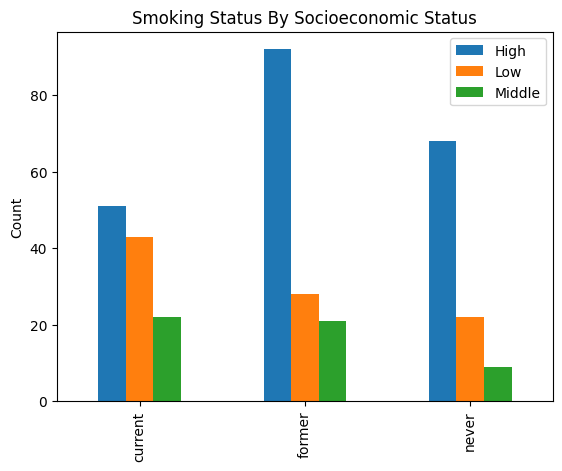

In [18]:
# 1. Simple bar plot
smoke.plot(kind="bar", title="Smoking Status By Socioeconomic Status")
plt.ylabel("Count")
plt.show()

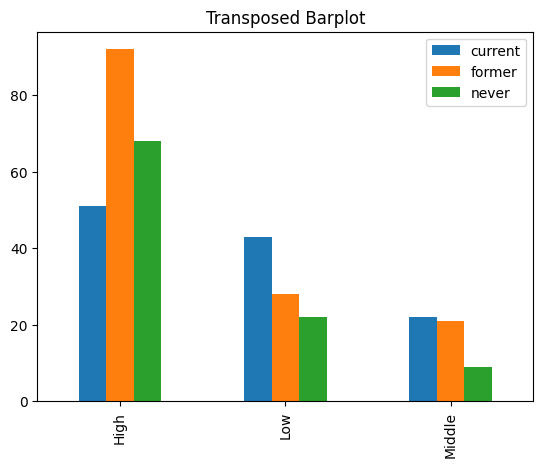

In [19]:
# 3. Transposed barplot
smoke.T.plot(kind="bar")
plt.title("Transposed Barplot")
plt.show()

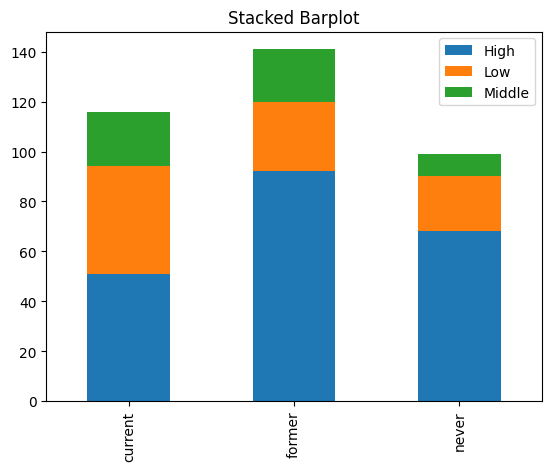

In [20]:
# 2. Stacked barplot
smoke.plot(kind="bar", stacked=True)
plt.title("Stacked Barplot")
plt.show()

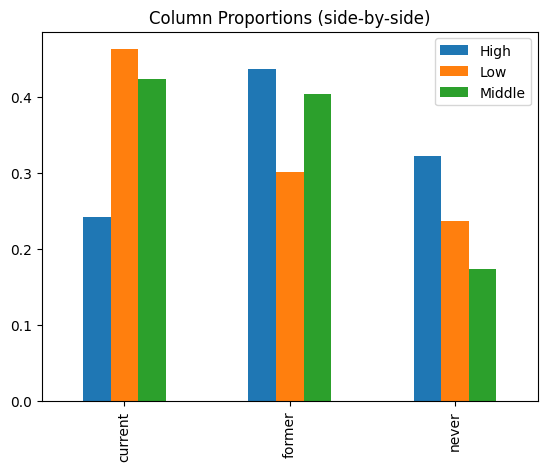

In [21]:
# 5. Column proportions
col_prop = smoke.div(smoke.sum(axis=0), axis=1)
col_prop.plot(kind="bar")
plt.title("Column Proportions (side-by-side)")
plt.show()

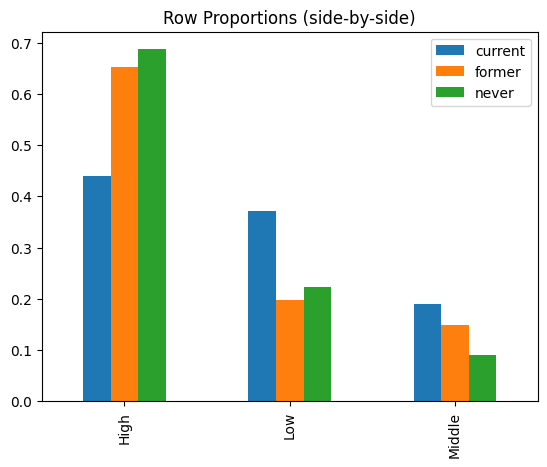

In [22]:
# 6. Row proportions with transpose (like prop.table(t(smoke), 2))
row_prop = smoke.T.div(smoke.T.sum(axis=0), axis=1)
row_prop.plot(kind="bar", stacked=False, legend=True)
plt.title("Row Proportions (side-by-side)")
plt.show()

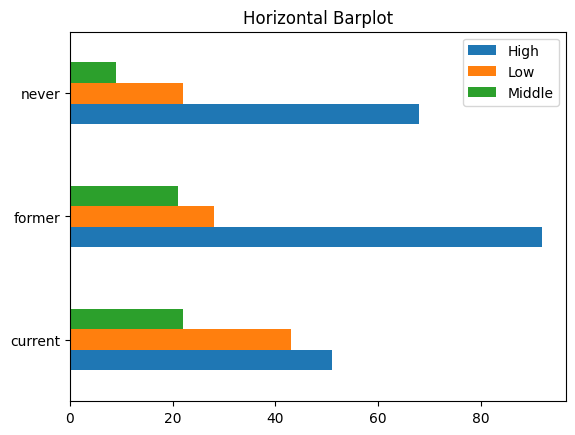

In [23]:
# 7. Horizontal Barplot we can also transpose it and stack it like shown above
smoke.plot(kind="barh")
plt.title("Horizontal Barplot")
plt.show()

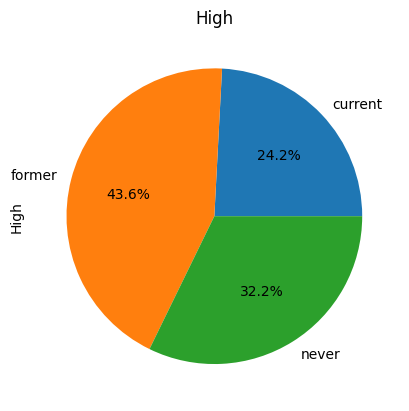

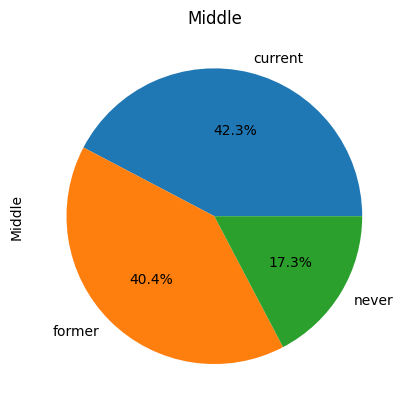

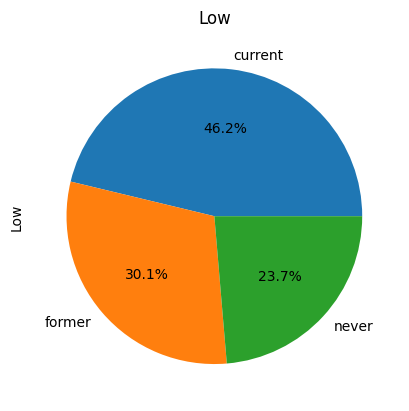

In [24]:
# 8. Pie chart for each column
smoke["High"].plot(kind="pie", autopct="%1.1f%%", title="High")
plt.show()

smoke["Middle"].plot(kind="pie", autopct="%1.1f%%", title="Middle")
plt.show()

smoke["Low"].plot(kind="pie", autopct="%1.1f%%", title="Low")
plt.show()